## Corrections for analyzing multiple metrics

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set()

#### Challenge

If multiple metrics are collected, the risk of making some kind of Type I error is given by (assuming independence of the variables):

$$\alpha_{over} = 1 - (1 - \alpha_{ind})^n$$

Drawing this risk for given individual $\alpha_{ind}$ of .05 and .01 can be illustrated like this:

In [3]:
np.arange(1, 20)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])

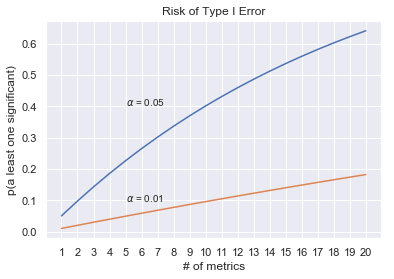

In [11]:
sequence = np.linspace(1, 20, 20) 
for alpha in [.05, .01]:
    plt.plot(sequence, 1-(1-alpha)**sequence)
    plt.text(5, 1-(1-alpha)**10, r'$\alpha$ = {:.2}'.format(alpha))
plt.xticks(sequence)
plt.title('Risk of Type I Error')
plt.xlabel('# of metrics')
plt.ylabel('p(a least one significant)')
plt.show()

#### Solution 1: Bonferroni Correction

$$\alpha_{ind} = \frac{\alpha_{over}}{n}$$

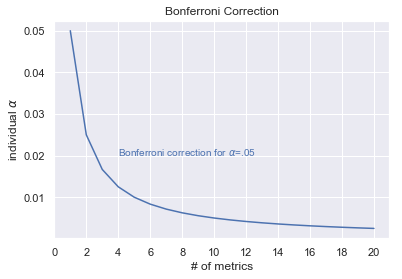

In [78]:
sequence = np.linspace(1, 20, 20)
p = plt.plot(sequence, .05/sequence)
plt.text(4, .02, r'Bonferroni correction for $\alpha$=.05', color=p[0].get_color())
plt.xticks(np.linspace(0, 20, 11))
plt.title('Bonferroni Correction')
plt.xlabel('# of metrics')
plt.ylabel(r'individual $\alpha$')
plt.show()

#### Solution 2: Šidák correction

A little less conservative approach which can be used if we assume independence between variables

$$ \alpha_{ind} = 1 - (1 - \alpha_{over})^{\frac{1}{n}} $$

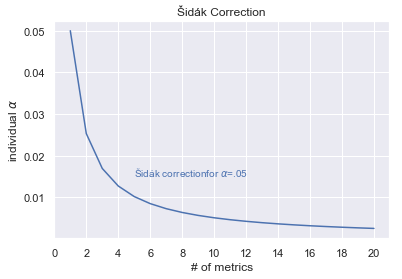

In [77]:
sequence = np.linspace(1, 20, 20)
p = plt.plot(sequence, 1 - (1-alpha)**(1/sequence))
plt.text(5, .015, r'Šidák correctionfor $\alpha$=.05', color=p[0].get_color())
plt.xticks(np.linspace(0, 20, 11))
plt.title('Šidák Correction')
plt.xlabel('# of metrics')
plt.ylabel(r'individual $\alpha$')
plt.show()

#### Comparision

The Sidak-Nunn correction is only slightly less conservative:

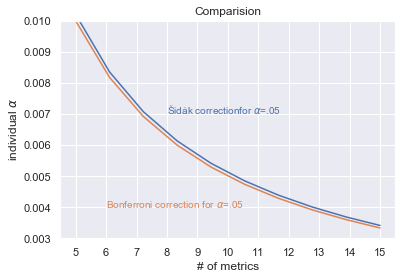

In [71]:
sequence = np.linspace(5, 15, 10)
p = plt.plot(sequence, 1 - (1-alpha)**(1/sequence))
plt.text(8, .007, r'Šidák correctionfor $\alpha$=.05', color=p[0].get_color())
p = plt.plot(sequence, alpha/sequence)
plt.text(6, .004, r'Bonferroni correction for $\alpha$=.05', color=p[0].get_color())
plt.xticks(np.linspace(5, 15, 11))
plt.title('Comparision')
plt.xlabel('# of metrics')
plt.ylabel(r'individual $\alpha$')
plt.ylim([0.003, 0.01])
plt.show()